In [18]:
# run this code snippet to import necessary libraries

import numpy as np
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from collections import Counter

# **1.**

Standard Deviation (SD) measures how spread out the individual data points within a single dataset. It is used to understand the variability of a single dataset. A high SD indicates that the values are spread out over a wider range, while a low SD indicates that the values are clustered closely around the mean.


Standard Error Mean (SEM) provides an estimate of how much the sample means you calculated from your data might differ from the true population mean if you were to take multiple samples of the same population. It also indicates how much the sample means would vary. Smaller SEM value indicates a more precise estimate (a.k.a. less varied sample means).

# **2.**

1. Perform bootstrapping on the population to generate a large number of sample groups. For each group, calculate the mean value of that group.
2. Calculate the mean of the sample means (let's say this is $\overline{x}$).
3. Calculate the standard deviation of the sample means. This value is also the standard error of the mean (let's say this is $SEM$).
4. Find the critical value to match the confidence interval (let's say this is $z$). For 95%, $z$ is roughly $1.96$.
5. Use the formula for the confidence interval:
$$\text{Confidence Interval } = \overline{x} \pm (z \times SEM)$$

# **3.**

1. Perform bootstrapping on the population to generate a large number of sample groups. For each group, calculate the mean value of that group.
2. Find the 2.5th and 97.5th percentiles of the sorted bootstrapped means. That will be the lower bound and the upper bound of the 95% confidence interval.

Link + summary (q1-q3): https://chatgpt.com/share/66fb1cd1-354c-8012-9a8a-89929ea797c5

# **4.**

Bootstrap 95% Confidence Interval for the population mean: (48.31, 50.13)


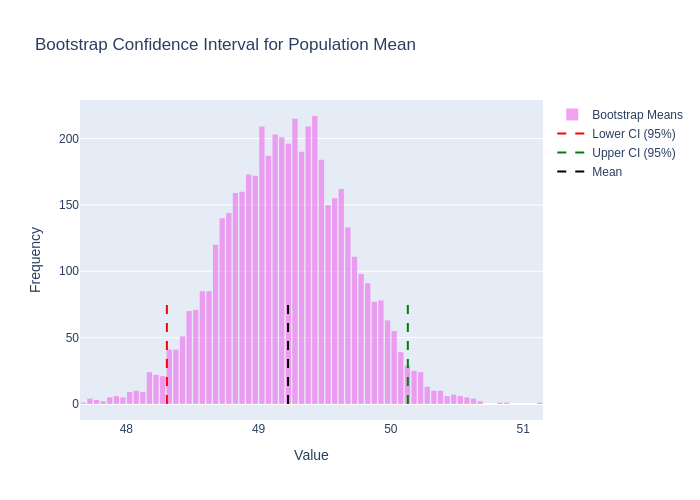

In [16]:
# fixed random seed for each code run (originally 42, but 69 is funny)
np.random.seed(69)

# create a sample of size 500 from the normal distribution
# (originally 100, but the resulting mean distribution is trash lmao)
sample_size = 500
sample = np.random.normal(loc=50, scale=10, size=sample_size)

# function for confidence interval (and the distribution of the bootstrap)
# number of simulation is 5000 (originally 1000)
# alpha is 0.05 because we want 95% confidence interval
def bootstrap_ci(data, num_bootstrap=5000, alpha=0.05):
    # calculate the statistic of the original sample (mean can be changed into median, standard deviation, etc.)
    original_statistic = np.mean(data) # changeable
    
    # generate samples. for each sample, compute statistic
    bootstrap_stats = []
    for _ in range(num_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_stats.append(np.mean(bootstrap_sample)) # changeable
    
    # lower and upper bound for the confidence interval
    lower_bound = np.percentile(bootstrap_stats, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrap_stats, 100 * (1 - alpha / 2))
    
    return original_statistic, lower_bound, upper_bound, bootstrap_stats

# get the stuff (the statistic for original sample, confidence interval, distribution of the samples' statistic)
mean_statistic, mean_lower_ci, mean_upper_ci, mean_distribution = bootstrap_ci(sample)

print(f"Bootstrap 95% Confidence Interval for the population mean: ({mean_lower_ci:.2f}, {mean_upper_ci:.2f})")

# plotly moment
fig = go.Figure()

# histogram for the distribution of the samples' statistic (i change blue to violet cuz yes :3)
fig.add_trace(go.Histogram(x=mean_distribution, nbinsx=100, name='Bootstrap Means', 
                           marker_color='violet', opacity=0.75))

# vertical lines for the statistic, lower CI, and upper CI
fig.add_trace(go.Scatter(x=[mean_lower_ci, mean_lower_ci], 
                         y=[0, 80], mode='lines', line=dict(color='red', dash='dash'),
                         name='Lower CI (95%)'))

fig.add_trace(go.Scatter(x=[mean_upper_ci, mean_upper_ci], 
                         y=[0, 80], mode='lines', line=dict(color='green', dash='dash'),
                         name='Upper CI (95%)'))

fig.add_trace(go.Scatter(x=[mean_statistic, mean_statistic], 
                         y=[0, 80], mode='lines', line=dict(color='black', dash='dash'),
                         name='Mean'))

# Add title and labels
fig.update_layout(title='Bootstrap Confidence Interval for Population Mean',
                  xaxis_title='Value',
                  yaxis_title='Frequency',
                  bargap=0.2)

# Show the figure
fig.show(renderer='png')

# to compute confidence interval for other statistic, change the np.mean() thing in the line with # changeable on it
# change it to np.median() for median, np.std() for standard deviation, etc.

Link + summary (q4): https://chatgpt.com/share/66fb2d89-4214-8012-b77b-0d1dae6d3f19

# **5.**

Population Parameter:
- True statistics of the population
- Is typically unknown in reality, especially if population is large (due to impracticality in measuring every individual)

Sample Statistics:
- Estimated statistics of the population through a sample (which is a subset of the population)
- Is subject to variability due to sampling; it may not perfectly represent the population

Confidence interval measures the sample statistics and its uncertainty, and the purpose of that interval is to make sure that the interval includes the true population parameter with a certain level of confidence.

Link + summary (q5): https://chatgpt.com/share/66fdf82a-c4cc-8012-ad3c-da6333343219 (i didn't ask for summary as i only asked one question and the answer also gives a summary lmao)

# **6.**

1. Imagine the population as balls inside a chest, where each ball contains a number. Suppose that for some weird reasons, you want to know the average number that is shown on the ball when you take a ball. Now, of course you don't want to calculate the average by looking at each number for each ball, right? Especially if it's like tens of thousands of balls. So, here is how bootstrapping works in a nutshell.

    Take 30 random balls from the chest, and put it in a sack. Then, perform the following steps below.

    First, you take one random balls out of the sack. You write the number on the ball somewhere, then you put it back into the sack and shake it (or shuffle it idk). Repeat it 30 times (since it's the sample size). After that, you just calculate the average of those 30 numbers. After you wrote the average somewhere (probably your paper), retrieve the balls back into the sack. Shake the sack to "randomize" it, then repeat from the first step again.
    
    After a few times repeating it, let's say 500 times (it's a lot ik), you will get 500 averages. This is called the mean distribution. Now, you can do whatever you want with these 500 numbers. You can calculate standard deviation (we call it standard error around here), finding percentiles, averaging the averages, twist the numbers, lick it, dunk it in milk, anything! For me, since I wanna estimate what the hell is the average of the balls inside the sack, I averaged the averages (crazy i know), and then plus and minus two times the standard error.
    
    "b-but it's two numbers" that's what we call a confidence interval (roughly 95% confidence). And with this, now I am 95% sure the average number is somewhere between this interval; I just have to find it (spoiler alert, I can't).
    
    Now, as you can see, for this specific bootstrapping, it's probably better to just count the averages if the number of balls are below 15k or smth. But in real life, retrieving that much population is probably really hard. It's more like for each ball you want to take from the chest (not the sack), you have to do a challenge. Better to do 30 challenges and 15k calculations rather than tens of thousands of challenges.
    
2. As I said before, confidence interval (i like to call it "the answer(s)" lmao) is one of the main purpose on why we use bootstrapping. It's like prediction magic but math, and with some level of confidence. And bootstrapping is simple as f- abc. Just grab some random balls, do a simulation with it, and repeat. There's also hypothesis testing as one of the main purposes, where you expect some shi is true and then you do bootstrapping to see if it's true or not.

3. Well, I'll do the bootstrapping procedure mentioned in 1, but with sample size of n (because original samples says so) and quite possibly 1000+ simulations (assuming that I use a computer here lmao). After I got the confidence interval (let's say it's 95% confidence), I'll check if my average is inside that interval. If it is, then it's possible that I'm correct. If it's not, then it's probably not plausible (womp womp).

# **7.**

A confidence interval overlapping zero can lead to "fail to reject null hypothesis" because even if the sample mean statistic is not zero, the confidence interval provide a range of uncertainty in the estimation of sample mean statistic. Since zero (or the null hypothesis) is inside this interval, we cannot overrule the fact that null hypothesis might be True.

Alternatively, if the confidence interval does not contain zero (or overlap with zero), then we can reject the null hypothesis since null hypothesis is likely to be false depends on the certainty of the confidence interval.

Link + summary (q7): https://chatgpt.com/share/66fea31f-54f8-8012-9841-8ef462e830dc (since i also ask only one question here, summary of the answer is also the summary)

# **8.**

## **Problem Introduction**

### **Null Hypothesis ("no effect" or "ineffective")**

A null hypothesis ($H_0$) is a default or base assumption that states there is "no effect" or "opposite of the desired effect" of the observed variable. In this context, since we want to see if the vaccine is effective, the null hypothesis of this would be that the vaccine either has no effect or negative effect (HealthScore change is 0 or negative), which makes the vaccine deemed as ineffective. For the alternative hypothesis ($H_A$), the vaccine has positive effect (HealthScore change is positive), which makes the vaccine effective. More formally:

$H_0 : \Delta HealthScore \leq 0$

$H_A : \Delta HealthScore > 0$

### **Visualization**

In [11]:
# this code imports the dataset

# csv file is called 'owo.csv'
df = pd.read_csv('owo.csv')

# new column indicating how much the health score has changed
# 'changes' here is the ΔHealthScore mentioned in the hypothesis
df['changes']=df['FinalHealthScore']-df['InitialHealthScore']

# show original data + the new column
df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,changes
0,1,45,M,84,86,2
1,2,34,F,78,86,8
2,3,29,M,83,80,-3
3,4,52,F,81,86,5
4,5,37,M,81,84,3
5,6,41,F,80,86,6
6,7,33,M,79,86,7
7,8,48,F,85,82,-3
8,9,26,M,76,83,7
9,10,39,F,83,84,1


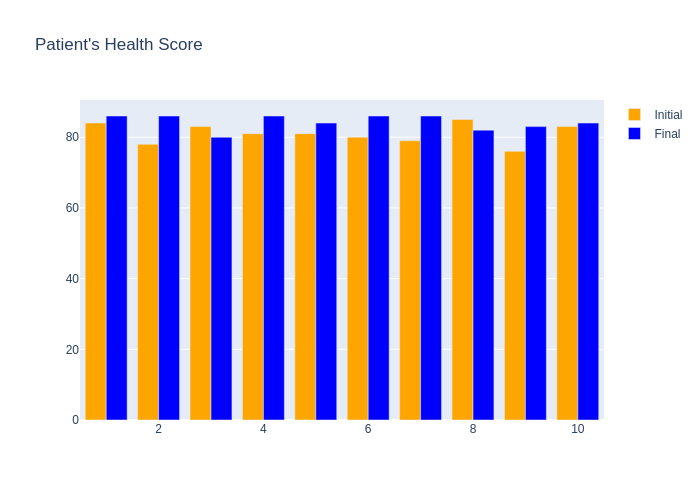

In [13]:
# this code visualize InitialHealthScore and FinalHealthScore

# create the figure
fig = go.Figure()

# InitialHealthScore bar chart
fig.add_trace(go.Bar(x=df['PatientID'], y=df['InitialHealthScore'], name='Initial', marker_color='orange'))

# FinalHealthScore bar chart
fig.add_trace(go.Bar(x=df['PatientID'], y=df['FinalHealthScore'], name='Final', marker_color='blue'))

# for side by side comparison
fig.update_layout(barmode='group', title='Patient\'s Health Score')

# show the final figure
# the x axis is just the PatientID
fig.show(renderer='png')

# Note: The only reason I can visualize this is because the sampled dataset is small
# would be a different story if it's 30+ samples lmao

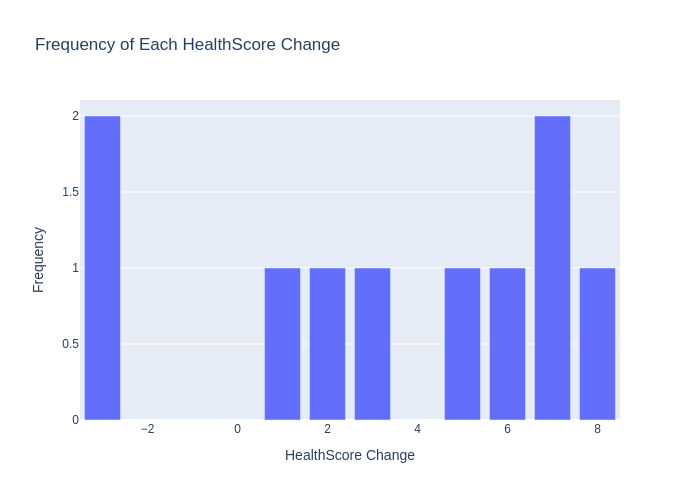

In [17]:
# this code visualize the frequency of each HealthScore change

sampled=df['changes']

# create frequency of values of sampled
freq=Counter(sampled)

# create the bar chart
fig = px.bar(x=list(freq.keys()), y=list(freq.values()), labels={'x': 'HealthScore Change', 'y': 'Frequency'},
             title="Frequency of Each HealthScore Change")

fig.show(renderer='png')

## **Quantitative Analysis**

### **Methodology Code and Explanation**

The methodology that I will be using here is bootstrapping combined with finding confidence interval. Bootstrapping is a resampling technique that can be used to estimate the sampling distribution of a statistic. It involves doing resampling from the original sample with duplicated data allowed to create new samples. For each new sample, calculate the statistic involved. Repeat this a few times to get the distribution of the sample statistics. Combined with the percentile method, the confidence interval can be calculated this way.

I will use the confidence interval to determine whether I can reject $H_0$ or not. Specifically, the 99% confidence interval. This code below will demonstrate how bootstrapping work and how to find confidence interval.

In [20]:
# this code demonstrate how bootstrapping work

# this year as the seed lmao
np.random.seed(2024)

# initialize list for sampled means
bootstrapped_means = []

# do simulation 5000 times
for _ in range(5000):
    samples=np.random.choice(sampled, sampled.size, replace=True)
    bootstrapped_means.append(np.mean(samples))
    
# calculate confidence interval (CI)
ci_low = np.quantile(bootstrapped_means, 0.005)
ci_high = np.quantile(bootstrapped_means, 0.995)

ci_low,ci_high

(0.2, 6.2)

### Visualization

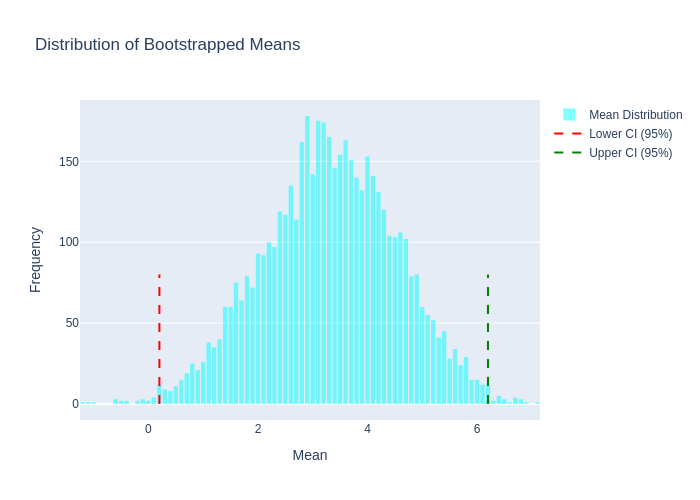

In [23]:
# visualization of the mean distribution and the confidence interval (from bootstrapped samples)
fig = go.Figure()

fig.add_trace(go.Histogram(x=bootstrapped_means, nbinsx=100, name="Mean Distribution", marker_color='cyan', opacity=0.5))

# vertical lines for lower CI and upper CI
fig.add_trace(go.Scatter(x=[ci_low, ci_low], 
                         y=[0, 80], mode='lines', line=dict(color='red', dash='dash'),
                         name='Lower CI (95%)'))

fig.add_trace(go.Scatter(x=[ci_high, ci_high], 
                         y=[0, 80], mode='lines', line=dict(color='green', dash='dash'),
                         name='Upper CI (95%)'))

fig.update_layout(title='Distribution of Bootstrapped Means',
                  xaxis_title='Mean',
                  yaxis_title='Frequency',
                  bargap=0.2)

fig.show(renderer='png')

## **Findings and Discussion**

### **Conclusion Regarding $H_0$**

Since the 99% confidence interval is (0.2, 6.2), and the lower bound of this interval is $> 0$, it can be concluded that $H_0$ can be rejected since it is most likely to be false.

So, the conclusion is that the vaccine is effective.

### **Further Considerations**

- The original sample size I worked with is 10, which is relatively small. This can lead to higher variability in the bootstrap estimates, making it potentially less reliable. More sample data are needed to decrease the variability of estimates.
- Alternative methodology that can be used in this analysis is the Bayesian approach, which can work very well on a small sample size. Although, this approach may need more knowledge about the population or the original sample.

Putting the considerations of the statistics used here aside; since the null hypothesis here is most likely false, I have a very big hope that this vaccine is very effective and can help improve the life and health quality of thousands of people. This finding can potentially improves the quality of othe vaccines around the world as well, since this vaccine focus on improving general health.

Link + summary (q8): https://chatgpt.com/share/66fee90e-4fd0-8012-92cb-8987bc334c9b (I only use ChatGPT here to provide an insight on what should I write on each part of the report, not the content of the report itself)